# Data

In [0]:
import pandas as pd

data = pd.read_csv('data.csv')

In [0]:
X_train = data.drop("y", axis=1).values[:int(0.8 * len(data))]
y_train = data["y"].values[:int(0.8 * len(data))]
X_test = data.drop("y", axis=1).values[int(0.8 * len(data)):]
y_test = data["y"].values[int(0.8 * len(data)):]

# Normalize Features

In [0]:
import numpy as np

def feature_normalize(X):
        mu = np.mean(X, axis=0)
        rang = np.ptp(X, axis=0)
        return (X - mu) / rang

X_train = feature_normalize(X_train)
X_test = feature_normalize(X_test)

# Logistic Regression

In [0]:
class LogisticRegression:
    def __init__(self, max_iter=100, eta0=0.1):
        self.max_iter = max_iter
        self.eta0 = eta0
    
    def sigmoid(self, z):
            return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        def initialize_parameters(dim):
            w = np.zeros((dim, 1))
            b = 0
        
            return {"w": w, "b": b}
        
        def propagate():
            a = self.sigmoid(np.dot(self.parameters["w"].T, self.X) + self.parameters["b"])

            return {"dw": 1 / self.m * np.dot(self.X, (a - self.y).T),
                    "db": 1 / self.m * np.sum(a - self.y)}, \
                    -1 / self.m * (np.sum(self.y * np.log(a) + (1 - self.y) * np.log(1 - a)))

        def optimize():
            costs = []

            for i in range(self.max_iter):
                grads, cost = propagate()

                self.parameters["w"] -= self.eta0 * grads["dw"]
                self.parameters["b"] -= self.eta0 * grads["db"]

                costs.append(cost)
                
            return costs

        self.X = X.T
        self.m = self.X.shape[1]
        self.y = y.reshape(1, self.m)
        self.parameters = initialize_parameters(self.X.shape[0])
        self.costs = optimize()

    def predict(self, X):
        X = X.T
        y_pred = np.zeros((1, X.shape[1]))
        a = self.sigmoid(np.dot(self.parameters["w"].T, X) + self.parameters["b"])

        for i in range(a.shape[1]):
            y_pred[0, i] = 0 if a[0, i] <= 0.5 else 1
        
        return y_pred

In [0]:
log_clf = LogisticRegression(max_iter=5000, eta0=1)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

In [6]:
accuracy_score = np.mean(y_pred == y_test)
accuracy_score

0.7

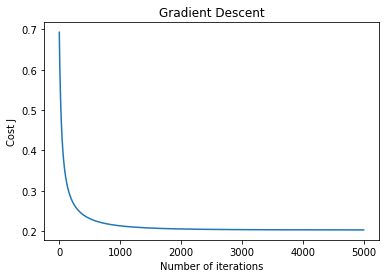

In [7]:
import matplotlib.pyplot as plt

plt.plot(log_clf.costs)
plt.title('Gradient Descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()